--- Data Head ---
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  

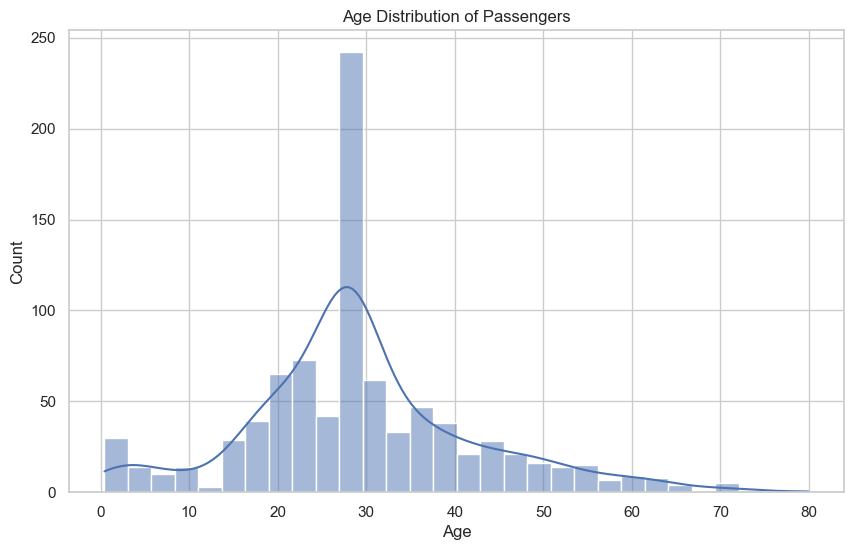

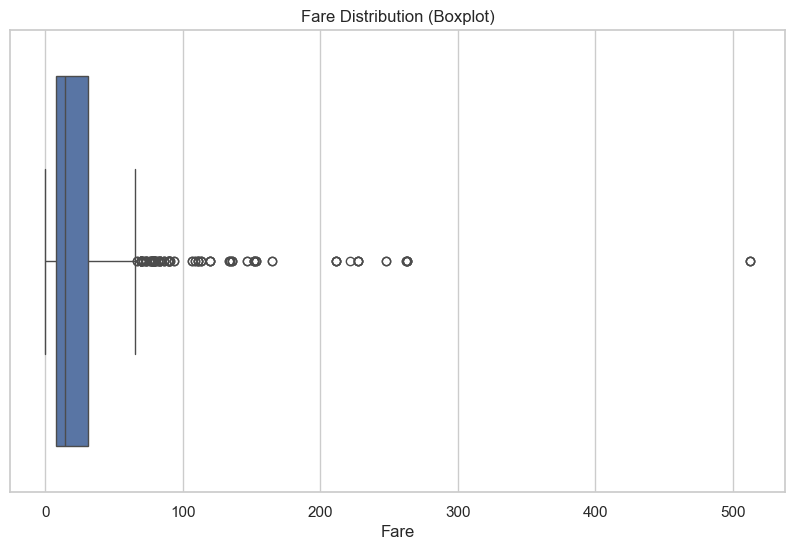

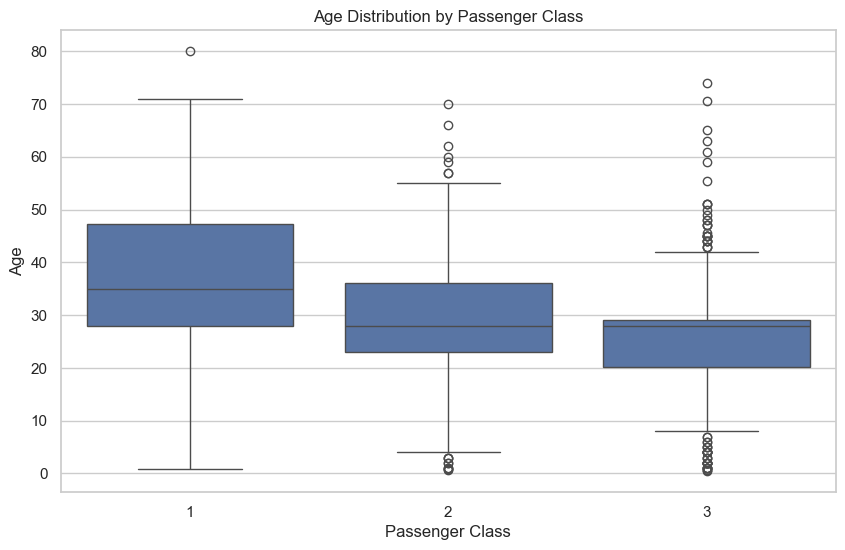

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df = sns.load_dataset('titanic')
print("--- Data Head ---")
print(df.head())
print("\n--- Data Info ---")
df.info()

print("\n--- Summary Statistics (Numeric) ---")
print(df.describe())
print("\n--- Summary Statistics (Categorical) ---")
print(df.describe(include=['object', 'category']))
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df = df.drop(columns=['deck'])

print("\n--- Missing Values After Cleaning ---")
print(df.isnull().sum())
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare'])
plt.title('Fare Distribution (Boxplot)')
plt.xlabel('Fare')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='survived', hue='sex', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.legend(title='Sex')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='survived', hue='pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.legend(title='Passenger Class')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['survived'] == 1]['fare'], label='Survived', shade=True)
sns.kdeplot(df[df['survived'] == 0]['fare'], label='Did Not Survive', shade=True)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 200) # Limit x-axis to see the main distribution
plt.show()

print("EDA Complete.")